In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the data

In [2]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


PROJECT_PATH = '/content/drive/My Drive/Datasets/ML Project'
DATASETS_PATH = f'{PROJECT_PATH}/data/recommended'
FIGURE_PATH = f'{PROJECT_PATH}/figures/cleaning'
TRAINING_PATH = f'{DATASETS_PATH}/training/training.csv'
TESTING_PATH = f'{DATASETS_PATH}/test/test.csv'
INDEX_COL = 'pkSeqID'
BEST_FEATURE_ORDER = [
  'seq', 'min', 'max', 'mean', 'stddev',
  'N_IN_Conn_P_SrcIP', 'N_IN_Conn_P_DstIP',
  'drate', 'srate',
  'saddr', 'sport', 'daddr', 'dport', 'proto',
  'state_number',
  'attack', 'category', 'subcategory'
]

In [3]:
training = pd.read_csv(TRAINING_PATH, index_col=INDEX_COL)[BEST_FEATURE_ORDER]
training.head()

,seq,min,max,mean,stddev,N_IN_Conn_P_SrcIP,N_IN_Conn_P_DstIP,drate,srate,saddr,sport,daddr,dport,proto,state_number,attack,category,subcategory
pkSeqID,,,,,,,,,,,,,,,,,,
3142762,251984,0.000000,4.031619,2.687519,1.900363,100,100,0.0,0.494549,192.168.100.150,6551,192.168.100.3,80,udp,4,1,DDoS,UDP
2432264,256724,3.856930,4.012924,3.934927,0.078003,38,100,0.0,0.256493,192.168.100.150,5532,192.168.100.3,80,tcp,3,1,DDoS,TCP
1976315,62921,2.974100,3.609205,3.341429,0.268666,100,100,0.0,0.294880,192.168.100.147,27165,192.168.100.3,80,tcp,3,1,DDoS,TCP
1240757,99168,0.000000,4.942302,3.222832,1.823185,63,63,0.0,0.461435,192.168.100.150,48719,192.168.100.3,80,udp,4,1,DoS,UDP
3257991,105063,2.979995,4.994452,3.983222,0.822418,100,100,0.0,1.002999,192.168.100.147,22461,192.168.100.3,80,udp,4,1,DDoS,UDP


In [4]:
testing = pd.read_csv(TESTING_PATH, index_col=INDEX_COL)[BEST_FEATURE_ORDER]

# General Analysis

In [5]:
print(f'Training Shape: {training.shape}')
print(f'Testing Shape: {testing.shape}')

Training Shape: (2934817, 18)
Testing Shape: (733705, 18)


In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2934817 entries, 3142762 to 96906
Data columns (total 18 columns):
 #   Column             Dtype  
---  ------             -----  
 0   seq                int64  
 1   min                float64
 2   max                float64
 3   mean               float64
 4   stddev             float64
 5   N_IN_Conn_P_SrcIP  int64  
 6   N_IN_Conn_P_DstIP  int64  
 7   drate              float64
 8   srate              float64
 9   saddr              object 
 10  sport              object 
 11  daddr              object 
 12  dport              object 
 13  proto              object 
 14  state_number       int64  
 15  attack             int64  
 16  category           object 
 17  subcategory        object 
dtypes: float64(6), int64(5), object(7)
memory usage: 425.4+ MB


In [7]:
import numpy as np

numerical = [training.columns[i] for i in range(len(training.columns)) if training.dtypes.iloc[i] != 'O']
non_numerical = [training.columns[i] for i in range(len(training.columns)) if training.dtypes.iloc[i] == 'O']

print(f'There are {len(numerical)} numerical features, and {len(non_numerical)} non numerical features')

There are 11 numerical features, and 7 non numerical features


In [8]:
training.isna().sum(axis=0)

,0
seq,0
min,0
max,0
mean,0
stddev,0
N_IN_Conn_P_SrcIP,0
N_IN_Conn_P_DstIP,0
drate,0
srate,0
saddr,0


In [9]:
sum(training.duplicated())

0

Dataset has no duplicated rows, or missing values.

In [10]:
training.head()

,seq,min,max,mean,stddev,N_IN_Conn_P_SrcIP,N_IN_Conn_P_DstIP,drate,srate,saddr,sport,daddr,dport,proto,state_number,attack,category,subcategory
pkSeqID,,,,,,,,,,,,,,,,,,
3142762,251984,0.000000,4.031619,2.687519,1.900363,100,100,0.0,0.494549,192.168.100.150,6551,192.168.100.3,80,udp,4,1,DDoS,UDP
2432264,256724,3.856930,4.012924,3.934927,0.078003,38,100,0.0,0.256493,192.168.100.150,5532,192.168.100.3,80,tcp,3,1,DDoS,TCP
1976315,62921,2.974100,3.609205,3.341429,0.268666,100,100,0.0,0.294880,192.168.100.147,27165,192.168.100.3,80,tcp,3,1,DDoS,TCP
1240757,99168,0.000000,4.942302,3.222832,1.823185,63,63,0.0,0.461435,192.168.100.150,48719,192.168.100.3,80,udp,4,1,DoS,UDP
3257991,105063,2.979995,4.994452,3.983222,0.822418,100,100,0.0,1.002999,192.168.100.147,22461,192.168.100.3,80,udp,4,1,DDoS,UDP


# Handling Unnecessary Data

## saddr Column

In [11]:
training['saddr'].value_counts()

,count
saddr,
192.168.100.147,761360
192.168.100.148,738642
192.168.100.150,712260
192.168.100.149,711466
192.168.100.3,6609
192.168.100.5,4107
192.168.100.6,272
192.168.100.7,34
192.168.100.4,17


Most of the source addresses are for a local network, so they are not that much useful in a real-world scenario

**Conclusion:**
`saddr` probably should be dropped

In [12]:
TO_DROP = ['saddr']

## daddr Column

In [13]:
training['daddr'].value_counts()

,count
daddr,
192.168.100.3,1900562
192.168.100.5,361192
192.168.100.7,332161
192.168.100.6,329679
192.168.100.150,3040
...,...
205.251.194.167,1
224.0.0.252,1
216.239.38.10,1


In [14]:
non_local_addr = training.loc[training['daddr'].map(lambda addr: not str(addr).startswith('192.168')), 'daddr']
l_non_local = len(non_local_addr)
l_local = len(training['daddr']) - l_non_local
print(f"Non-Local to Local ratio: {l_non_local} / {l_local} = {l_non_local / l_local}")
non_local_addr.value_counts()

Non-Local to Local ratio: 242 / 2934575 = 8.246509290101632e-05


,count
daddr,
8.8.8.8,48
224.0.0.251,42
27.124.125.250,12
ff02::fb,7
ff02::2,6
...,...
205.251.194.167,1
224.0.0.252,1
216.239.38.10,1


A high number of destination addresses are from a local network, likely not to occur in real world scenario.

**Conclusion:** `daddr` is to dropped

In [15]:
TO_DROP += ['daddr']
print(TO_DROP)

['saddr', 'daddr']


## seq Column

In [16]:
training.head()

,seq,min,max,mean,stddev,N_IN_Conn_P_SrcIP,N_IN_Conn_P_DstIP,drate,srate,saddr,sport,daddr,dport,proto,state_number,attack,category,subcategory
pkSeqID,,,,,,,,,,,,,,,,,,
3142762,251984,0.000000,4.031619,2.687519,1.900363,100,100,0.0,0.494549,192.168.100.150,6551,192.168.100.3,80,udp,4,1,DDoS,UDP
2432264,256724,3.856930,4.012924,3.934927,0.078003,38,100,0.0,0.256493,192.168.100.150,5532,192.168.100.3,80,tcp,3,1,DDoS,TCP
1976315,62921,2.974100,3.609205,3.341429,0.268666,100,100,0.0,0.294880,192.168.100.147,27165,192.168.100.3,80,tcp,3,1,DDoS,TCP
1240757,99168,0.000000,4.942302,3.222832,1.823185,63,63,0.0,0.461435,192.168.100.150,48719,192.168.100.3,80,udp,4,1,DoS,UDP
3257991,105063,2.979995,4.994452,3.983222,0.822418,100,100,0.0,1.002999,192.168.100.147,22461,192.168.100.3,80,udp,4,1,DDoS,UDP


In [17]:
training.describe()

,seq,min,max,mean,stddev,N_IN_Conn_P_SrcIP,N_IN_Conn_P_DstIP,drate,srate,state_number,attack
count,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06
mean,1.212973e+05,1.017208e+00,3.019269e+00,2.230471e+00,8.869639e-01,8.254997e+01,9.245766e+01,4.303064e-01,3.128290e+00,3.134219e+00,9.998739e-01
std,7.578700e+04,1.483551e+00,1.860915e+00,1.517766e+00,8.036391e-01,2.439019e+01,1.816651e+01,5.623304e+01,7.845494e+02,1.187107e+00,1.122750e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.484700e+04,0.000000e+00,2.804170e-01,1.819340e-01,2.999700e-02,6.900000e+01,1.000000e+02,0.000000e+00,1.558450e-01,3.000000e+00,1.000000e+00
50%,1.177370e+05,0.000000e+00,4.008429e+00,2.689973e+00,7.925750e-01,1.000000e+02,1.000000e+02,0.000000e+00,2.837800e-01,4.000000e+00,1.000000e+00
75%,1.848700e+05,2.147949e+00,4.292426e+00,3.565061e+00,1.745220e+00,1.000000e+02,1.000000e+02,0.000000e+00,4.880000e-01,4.000000e+00,1.000000e+00
max,2.622110e+05,4.980471e+00,4.999999e+00,4.981882e+00,2.496763e+00,1.000000e+02,1.000000e+02,5.882353e+04,1.000000e+06,1.100000e+01,1.000000e+00


The `seq` column is defined as the Argus (an open-source tool used as a data source for an **ML for anamoly detection** use case).

Since this model is meant to be general and the `seq` doesn't carry any useful information it should be dropped.

In [18]:
TO_DROP += ['seq']

In [19]:
training.head()

,seq,min,max,mean,stddev,N_IN_Conn_P_SrcIP,N_IN_Conn_P_DstIP,drate,srate,saddr,sport,daddr,dport,proto,state_number,attack,category,subcategory
pkSeqID,,,,,,,,,,,,,,,,,,
3142762,251984,0.000000,4.031619,2.687519,1.900363,100,100,0.0,0.494549,192.168.100.150,6551,192.168.100.3,80,udp,4,1,DDoS,UDP
2432264,256724,3.856930,4.012924,3.934927,0.078003,38,100,0.0,0.256493,192.168.100.150,5532,192.168.100.3,80,tcp,3,1,DDoS,TCP
1976315,62921,2.974100,3.609205,3.341429,0.268666,100,100,0.0,0.294880,192.168.100.147,27165,192.168.100.3,80,tcp,3,1,DDoS,TCP
1240757,99168,0.000000,4.942302,3.222832,1.823185,63,63,0.0,0.461435,192.168.100.150,48719,192.168.100.3,80,udp,4,1,DoS,UDP
3257991,105063,2.979995,4.994452,3.983222,0.822418,100,100,0.0,1.002999,192.168.100.147,22461,192.168.100.3,80,udp,4,1,DDoS,UDP


## attack Column

In [20]:
training['category'].value_counts()

,count
category,
DDoS,1541315
DoS,1320148
Reconnaissance,72919
Normal,370
Theft,65


In [21]:
print(f"# Normal traffic (using attack features) not classified as 'Normal' category: {sum(training.loc[training['attack'] == 0, 'category'] != 'Normal')}")
print(f"# Normal traffic (using category features) not equal to 0 for attack: {sum(training.loc[training['category'] == 'Normal', 'attack'] != 0)}")

# Normal traffic (using attack features) not classified as 'Normal' category: 0
# Normal traffic (using category features) not equal to 0 for attack: 0


The category already carries the information needed and stored by the attack column, so it is probably good to drop it

In [22]:
TO_DROP += ['attack']
print(TO_DROP)

['saddr', 'daddr', 'seq', 'attack']


## Removing Unnecessary Information

In [23]:
training.drop(TO_DROP, axis=1, inplace=True)
testing.drop(TO_DROP, axis=1, inplace=True)

# Analysis of Target Features

## Selecting a New Target

In [24]:
training['category'].value_counts()

,count
category,
DDoS,1541315
DoS,1320148
Reconnaissance,72919
Normal,370
Theft,65


In [25]:
training['subcategory'].value_counts()

,count
subcategory,
UDP,1584650
TCP,1274843
Service_Scan,58626
OS_Fingerprint,14293
HTTP,1970
Normal,370
Keylogging,59
Data_Exfiltration,6


Since the `subcategory` column also contains useful information about the type of attack it is useful to keep it as a target so
it is reasonable to have a single column combining both `category` and `subcategory`

In [26]:
training['category'] = training['category'] + ' ' + training['subcategory']
testing['category'] = testing['category'] + ' ' + testing['subcategory']

In [27]:
training.drop('subcategory', axis=1, inplace=True)
testing.drop('subcategory', axis=1, inplace=True)

In [28]:
training['category'].value_counts()

,count
category,
DoS UDP,826349
DDoS TCP,782228
DDoS UDP,758301
DoS TCP,492615
Reconnaissance Service_Scan,58626
Reconnaissance OS_Fingerprint,14293
DoS HTTP,1184
DDoS HTTP,786
Normal Normal,370


In [29]:
category_counts = training['category'].value_counts()
(category_counts / category_counts.max()) * 100

,count
category,
DoS UDP,100.000000
DDoS TCP,94.660731
DDoS UDP,91.765223
DoS TCP,59.613432
Reconnaissance Service_Scan,7.094581
Reconnaissance OS_Fingerprint,1.729657
DoS HTTP,0.143281
DDoS HTTP,0.095117
Normal Normal,0.044775


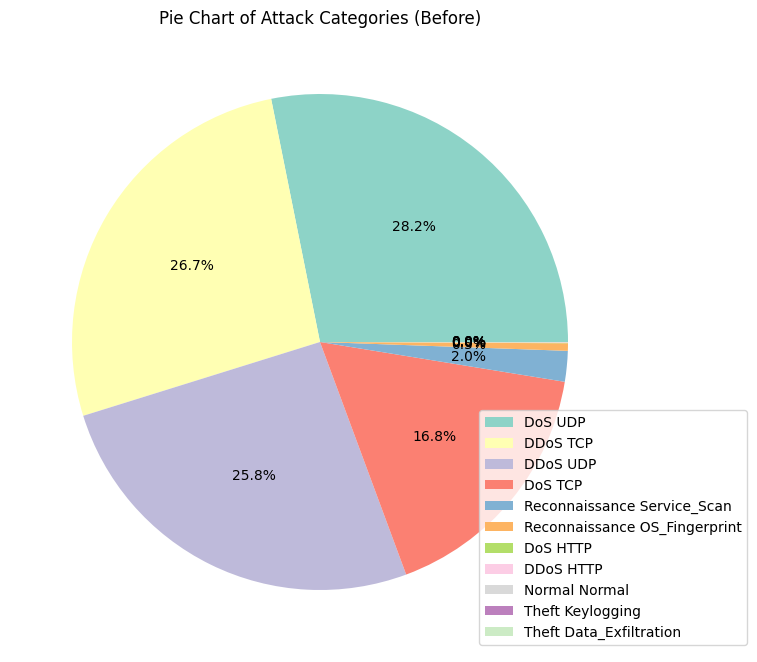

In [30]:
category_counts = training['category'].value_counts()
plt.figure(figsize=(8, 14))
colors = plt.cm.Set3(range(len(category_counts)))  # or use custom colors
plt.pie(category_counts, labels=None, colors=colors, autopct='%1.1f%%')
plt.legend(category_counts.index, loc='lower right', bbox_to_anchor=(1.2, 0))
plt.title('Pie Chart of Attack Categories (Before)')
plt.savefig(f'{FIGURE_PATH}/category_pie_before.png')

We also notice that the data is very skewed when it comes to attack types (`Theft Data_Exfiltration` is 0.0007% of the amount of `DDoS UDP` attack instances)
This is something that needs to be addressed or the results might be missleading.

One quick fix is to have the `Theft` category be one, since there are not much `Theft Data_Exfiltration` instances, so the category can be generalized to `Theft`

Also the `Normal Normal` category can be changed for presentation purposes

## Cleaning the Target

In [31]:
training['category'].value_counts()

,count
category,
DoS UDP,826349
DDoS TCP,782228
DDoS UDP,758301
DoS TCP,492615
Reconnaissance Service_Scan,58626
Reconnaissance OS_Fingerprint,14293
DoS HTTP,1184
DDoS HTTP,786
Normal Normal,370


In [32]:
from numpy._core.defchararray import startswith
clean_target = lambda cat: (
    'Theft' if str(cat).lower().startswith('theft') else (
        'Normal' if str(cat).lower().startswith('normal') else cat
    )
)
training['category'] = training['category'].map(clean_target)
training['category'].value_counts()

,count
category,
DoS UDP,826349
DDoS TCP,782228
DDoS UDP,758301
DoS TCP,492615
Reconnaissance Service_Scan,58626
Reconnaissance OS_Fingerprint,14293
DoS HTTP,1184
DDoS HTTP,786
Normal,370


In [33]:
testing['category'] = testing['category'].map(clean_target)

Another change that could be done is merging http and tcp traffic, since http builds on top of tcp

so `DoS HTTP` can be merged with `DoS TCP`, and `DDoS HTTP` with `DDoS TCP`

In [34]:
clean_target = lambda cat: 'DoS TCP' if cat == 'DoS HTTP' else 'DDoS TCP' if cat == 'DDoS HTTP' else cat
training['category'] = training['category'].map(clean_target)
training['category'].value_counts()

,count
category,
DoS UDP,826349
DDoS TCP,783014
DDoS UDP,758301
DoS TCP,493799
Reconnaissance Service_Scan,58626
Reconnaissance OS_Fingerprint,14293
Normal,370
Theft,65


In [35]:
testing['category'] = testing['category'].map(clean_target)

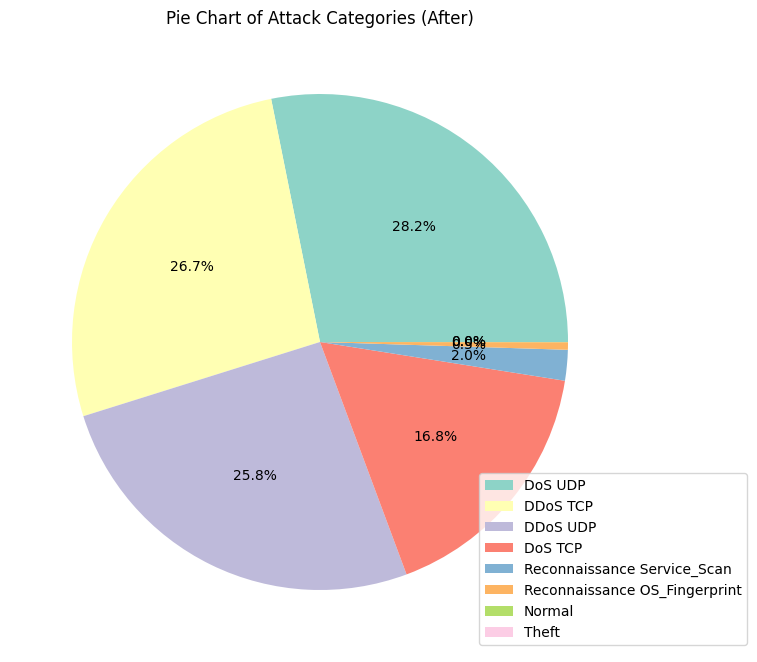

In [36]:
category_counts = training['category'].value_counts()
plt.figure(figsize=(8, 14))
colors = plt.cm.Set3(range(len(category_counts)))  # or use custom colors
plt.pie(category_counts, labels=None, colors=colors, autopct='%1.1f%%')
plt.legend(category_counts.index, loc='lower right', bbox_to_anchor=(1.2, 0))
plt.title('Pie Chart of Attack Categories (After)')
plt.savefig(f'{FIGURE_PATH}/category_pie_after.png')

# Checkpointing

In [37]:
TESTING_CLEANED = f'{DATASETS_PATH}/test/test_cleaned.csv'
TRAINING_CLEANED_PATH = f'{DATASETS_PATH}/training/training_cleaned.csv'

## Creation

In [38]:
tmp = training.reset_index(drop=False)
tmp.to_csv(TRAINING_CLEANED_PATH, index=False)
tmp.head()

,pkSeqID,min,max,mean,stddev,N_IN_Conn_P_SrcIP,N_IN_Conn_P_DstIP,drate,srate,sport,dport,proto,state_number,category
0,3142762,0.000000,4.031619,2.687519,1.900363,100,100,0.0,0.494549,6551,80,udp,4,DDoS UDP
1,2432264,3.856930,4.012924,3.934927,0.078003,38,100,0.0,0.256493,5532,80,tcp,3,DDoS TCP
2,1976315,2.974100,3.609205,3.341429,0.268666,100,100,0.0,0.294880,27165,80,tcp,3,DDoS TCP
3,1240757,0.000000,4.942302,3.222832,1.823185,63,63,0.0,0.461435,48719,80,udp,4,DoS UDP
4,3257991,2.979995,4.994452,3.983222,0.822418,100,100,0.0,1.002999,22461,80,udp,4,DDoS UDP


In [39]:
tmp = testing.reset_index(drop=False)
tmp.to_csv(TESTING_CLEANED, index=False)

## Recovery

In [40]:
training = pd.read_csv(TRAINING_CLEANED_PATH, index_col=INDEX_COL)

In [41]:
testing = pd.read_csv(TESTING_CLEANED, index_col=INDEX_COL)

In [42]:
training.head()

,min,max,mean,stddev,N_IN_Conn_P_SrcIP,N_IN_Conn_P_DstIP,drate,srate,sport,dport,proto,state_number,category
pkSeqID,,,,,,,,,,,,,
3142762,0.000000,4.031619,2.687519,1.900363,100,100,0.0,0.494549,6551,80,udp,4,DDoS UDP
2432264,3.856930,4.012924,3.934927,0.078003,38,100,0.0,0.256493,5532,80,tcp,3,DDoS TCP
1976315,2.974100,3.609205,3.341429,0.268666,100,100,0.0,0.294880,27165,80,tcp,3,DDoS TCP
1240757,0.000000,4.942302,3.222832,1.823185,63,63,0.0,0.461435,48719,80,udp,4,DoS UDP
3257991,2.979995,4.994452,3.983222,0.822418,100,100,0.0,1.002999,22461,80,udp,4,DDoS UDP


# Categorical Features

## sport and dport

In [43]:
training['sport'].value_counts()

,count
sport,
0x0303,7156
80,3220
1822,878
60541,869
1216,868
...,...
7813,31
39305,30
18992,30


In [44]:
training['sport'][training['sport'].map(lambda port: str(port).startswith('0x'))]

,sport
pkSeqID,
3606493,0x0303
3608842,0x0303
3603747,0x0303
3642170,0x0303
3606542,0x0303
...,...
3656127,0x0303
3603030,0x0303
3602285,0x0303


In [45]:
training['dport'][training['dport'].map(lambda port: str(port).startswith('0x'))]

,dport
pkSeqID,
3606493,0x0c80
3608842,0x42e0
3603747,0x697a
3642170,0x0102
3606542,0x0db4
...,...
3656127,0x95ba
3603030,0xe403
3602285,0xfc03


As we can see some of the port numbers are written in hexadecimal when it comes to `sport` and `dport`, so they need to be all converted to decimal, and the column type converted to int64

In [46]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2934817 entries, 3142762 to 96906
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   min                float64
 1   max                float64
 2   mean               float64
 3   stddev             float64
 4   N_IN_Conn_P_SrcIP  int64  
 5   N_IN_Conn_P_DstIP  int64  
 6   drate              float64
 7   srate              float64
 8   sport              object 
 9   dport              object 
 10  proto              object 
 11  state_number       int64  
 12  category           object 
dtypes: float64(6), int64(3), object(4)
memory usage: 313.5+ MB


In [47]:
convert_hex = lambda p: int(p) if not str(p).startswith('0x') else int(p, base=16)

In [48]:
training['sport'] = training['sport'].map(convert_hex)
training['sport']

,sport
pkSeqID,
3142762,6551
2432264,5532
1976315,27165
1240757,48719
3257991,22461
...,...
1132803,56044
3384621,21546
775893,30897


In [49]:
training['dport'] = training['dport'].map(convert_hex)
training['dport']

,dport
pkSeqID,
3142762,80
2432264,80
1976315,80
1240757,80
3257991,80
...,...
1132803,80
3384621,80
775893,80


In [50]:
testing['sport'] = testing['sport'].map(convert_hex)
testing['dport'] = testing['dport'].map(convert_hex)

In [51]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2934817 entries, 3142762 to 96906
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   min                float64
 1   max                float64
 2   mean               float64
 3   stddev             float64
 4   N_IN_Conn_P_SrcIP  int64  
 5   N_IN_Conn_P_DstIP  int64  
 6   drate              float64
 7   srate              float64
 8   sport              int64  
 9   dport              int64  
 10  proto              object 
 11  state_number       int64  
 12  category           object 
dtypes: float64(6), int64(5), object(2)
memory usage: 313.5+ MB


## Real Categorical Features

In [52]:
training['proto'].value_counts()

,count
proto,
udp,1596819
tcp,1330598
icmp,7228
arp,166
ipv6-icmp,6


In [53]:
training['category'].value_counts()

,count
category,
DoS UDP,826349
DDoS TCP,783014
DDoS UDP,758301
DoS TCP,493799
Reconnaissance Service_Scan,58626
Reconnaissance OS_Fingerprint,14293
Normal,370
Theft,65


Some of the columns are categorical and can be handled with `OneHotEncoder`, for example.

# Checkpointing

## Creation

In [54]:
tmp = training.reset_index(drop=False)
tmp.to_csv(TRAINING_CLEANED_PATH, index=False)
tmp.head()

,pkSeqID,min,max,mean,stddev,N_IN_Conn_P_SrcIP,N_IN_Conn_P_DstIP,drate,srate,sport,dport,proto,state_number,category
0,3142762,0.000000,4.031619,2.687519,1.900363,100,100,0.0,0.494549,6551,80,udp,4,DDoS UDP
1,2432264,3.856930,4.012924,3.934927,0.078003,38,100,0.0,0.256493,5532,80,tcp,3,DDoS TCP
2,1976315,2.974100,3.609205,3.341429,0.268666,100,100,0.0,0.294880,27165,80,tcp,3,DDoS TCP
3,1240757,0.000000,4.942302,3.222832,1.823185,63,63,0.0,0.461435,48719,80,udp,4,DoS UDP
4,3257991,2.979995,4.994452,3.983222,0.822418,100,100,0.0,1.002999,22461,80,udp,4,DDoS UDP


In [55]:
tmp = testing.reset_index(drop=False)
tmp.to_csv(TESTING_CLEANED, index=False)

## Recovery

In [56]:
training = pd.read_csv(TRAINING_CLEANED_PATH, index_col=INDEX_COL)

In [57]:
testing = pd.read_csv(TESTING_CLEANED, index_col=INDEX_COL)

In [58]:
training['category'].value_counts()

,count
category,
DoS UDP,826349
DDoS TCP,783014
DDoS UDP,758301
DoS TCP,493799
Reconnaissance Service_Scan,58626
Reconnaissance OS_Fingerprint,14293
Normal,370
Theft,65
